# Analyse sur l'année 2017
## Q1: Proportion de personnes en état de sous-nutrition
### Import et vérification des données

In [1]:
#On importe les librairies dont nous aurons besoin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#On crée les dataframes à partir des fichiers csv
df_sous_nutrition = pd.read_csv(('/home/paul/Bureau/OPENCLASSROOM/PROJET/4/sous_nutrition.csv'))
df_population = pd.read_csv('/home/paul/Bureau/OPENCLASSROOM/PROJET/4/population.csv')
print(df_sous_nutrition)
print('- - - - - - - - - - - - - - - -')
print(df_population)

             Zone      Année Valeur
0     Afghanistan  2012-2014    8.6
1     Afghanistan  2013-2015    8.8
2     Afghanistan  2014-2016    8.9
3     Afghanistan  2015-2017    9.7
4     Afghanistan  2016-2018   10.5
...           ...        ...    ...
1213     Zimbabwe  2013-2015    NaN
1214     Zimbabwe  2014-2016    NaN
1215     Zimbabwe  2015-2017    NaN
1216     Zimbabwe  2016-2018    NaN
1217     Zimbabwe  2017-2019    NaN

[1218 rows x 3 columns]
- - - - - - - - - - - - - - - -
             Zone  Année     Valeur
0     Afghanistan   2013  32269.589
1     Afghanistan   2014  33370.794
2     Afghanistan   2015  34413.603
3     Afghanistan   2016  35383.032
4     Afghanistan   2017  36296.113
...           ...    ...        ...
1411     Zimbabwe   2014  13586.707
1412     Zimbabwe   2015  13814.629
1413     Zimbabwe   2016  14030.331
1414     Zimbabwe   2017  14236.595
1415     Zimbabwe   2018  14438.802

[1416 rows x 3 columns]


In [3]:
#On regarde les types de données
print(df_sous_nutrition.dtypes)
print('- - - - - - - - - - - - -')
print(df_population.dtypes)

Zone      object
Année     object
Valeur    object
dtype: object
- - - - - - - - - - - - -
Zone       object
Année       int64
Valeur    float64
dtype: object


In [4]:
#On précise à quoi correspondent les colonnes "Valeur" de chaque dataframe
df_sous_nutrition.rename(columns = {'Valeur' : 'sous_nutrition_en_millions'}, inplace = True)
df_population.rename(columns = {'Valeur' : 'population_en_milliers'}, inplace = True)
print(df_sous_nutrition.head())
print('- - - - - - - - - - - - - - - -')
print(df_population.head())

          Zone      Année sous_nutrition_en_millions
0  Afghanistan  2012-2014                        8.6
1  Afghanistan  2013-2015                        8.8
2  Afghanistan  2014-2016                        8.9
3  Afghanistan  2015-2017                        9.7
4  Afghanistan  2016-2018                       10.5
- - - - - - - - - - - - - - - -
          Zone  Année  population_en_milliers
0  Afghanistan   2013               32269.589
1  Afghanistan   2014               33370.794
2  Afghanistan   2015               34413.603
3  Afghanistan   2016               35383.032
4  Afghanistan   2017               36296.113


In [5]:
#On remplace les périodes de df_sous_nutrition par des années, comme conseillé par Julien, pour nous permettre de faire des jointures
df_sous_nutrition.replace({'2012-2014': 2013, '2013-2015': 2014, '2014-2016': 2015, '2015-2017': 2016, '2016-2018': 2017,'2017-2019': 2018}, inplace = True)
df_sous_nutrition

,Zone,Année,sous_nutrition_en_millions
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1213,Zimbabwe,2014,NaN
1214,Zimbabwe,2015,NaN
1215,Zimbabwe,2016,NaN
1216,Zimbabwe,2017,NaN


In [6]:
#On ne garde que les valeur pour 2017
df_sous_nutrition_2017 = df_sous_nutrition.drop(df_sous_nutrition.loc[df_sous_nutrition['Année'] != 2017].index)
df_population_2017 = df_population.drop(df_population.loc[df_population['Année'] != 2017].index)
print(df_sous_nutrition_2017.dtypes)
print ('- - - - - - - - - - - - - -')
print(df_population_2017.dtypes)

Zone                          object
Année                          int64
sous_nutrition_en_millions    object
dtype: object
- - - - - - - - - - - - - -
Zone                       object
Année                       int64
population_en_milliers    float64
dtype: object


In [7]:
#On regarde les données de la colonne "sous_nutrition (en millions)" pour comprendre lesquelles ne sont pas numériques
df_sous_nutrition_2017.sous_nutrition_en_millions.unique()

array(['10.5', '3.1', '0.1', '1.3', nan, '5.8', '1.6', '1.5', '<0.1',
       '21.5', '0.8', '1.7', '0.5', '0.2', '3.6', '2.4', '0.6', '0.9',
       '2.7', '1.4', '4.9', '4.6', '0.3', '21.1', '2', '5.3', '190.1',
       '23.6', '3.9', '9', '11.9', '0.4', '1.8', '1', '3.3', '8.4', '9.4',
       '7.3', '1.1', '22.8', '24.8', '2.2', '15.7', '12', '13.4', '4.2',
       '5', '5.7', '6.2', '8', '6.5'], dtype=object)

In [8]:
#On compte le nombre de "nan" et de "<0.1"
print(df_sous_nutrition_2017['sous_nutrition_en_millions'].isna().sum())
print('- - - - - - - - - - - - -')
print(df_sous_nutrition_2017.loc[df_sous_nutrition_2017['sous_nutrition_en_millions']=='<0.1'].value_counts(subset = 'sous_nutrition_en_millions'))

99
- - - - - - - - - - - - -
sous_nutrition_en_millions
<0.1    20
dtype: int64


In [9]:
# On regarde la proportion de la population présente dans les pays avec une sous-nutrition nulle
df_pop_sn = pd.merge(df_sous_nutrition_2017, df_population_2017)
part_snNulle = df_pop_sn['population_en_milliers'].loc[df_pop_sn['sous_nutrition_en_millions'].isna()].sum()/df_pop_sn['population_en_milliers'].sum()*100
print(round(part_snNulle, 1), '%')

44.6 %


In [10]:
#On remplace les "nan" par 0 pour ne pas se priver de 44,6 % de la population mondiale
df_pop_sn['sous_nutrition_en_millions'] = df_pop_sn['sous_nutrition_en_millions'].fillna(0)
df_pop_sn.sous_nutrition_en_millions.unique()

array(['10.5', '3.1', '0.1', '1.3', 0, '5.8', '1.6', '1.5', '<0.1',
       '21.5', '0.8', '1.7', '0.5', '0.2', '3.6', '2.4', '0.6', '0.9',
       '2.7', '1.4', '4.9', '4.6', '0.3', '21.1', '2', '5.3', '190.1',
       '23.6', '3.9', '9', '11.9', '0.4', '1.8', '1', '3.3', '8.4', '9.4',
       '7.3', '1.1', '22.8', '24.8', '2.2', '15.7', '12', '13.4', '4.2',
       '5', '5.7', '6.2', '8', '6.5'], dtype=object)

In [11]:
# On regarde la proportion de la population présente dans les pays avec une sous_nutrition = <0.1
df_part_snFaible = df_pop_sn.drop(df_pop_sn.loc[df_pop_sn['sous_nutrition_en_millions'] != '<0.1'].index)
part_snFaible = df_part_snFaible['population_en_milliers'].sum()/df_pop_sn['population_en_milliers'].sum()*100
print(round(part_snFaible, 1), '%')

0.2 %


In [13]:
#On élime les pays avec un nombre de personnes sous-alimentées faible pour l'analyse mondiale (attention ceci ne signifie pas que le taux de sous-nutrition de ces pays est, lui aussi, faible). Si nécessaire, ils peuvent faire l'objet d'une analyse séparée
df_pop_sn = df_pop_sn.drop(df_pop_sn.loc[df_pop_sn['sous_nutrition_en_millions'] == '<0.1'].index)
df_pop_sn

,Zone,Année,sous_nutrition_en_millions,population_en_milliers
0,Afghanistan,2017,10.5,36296.113
1,Afrique du Sud,2017,3.1,57009.756
2,Albanie,2017,0.1,2884.169
3,Algérie,2017,1.3,41389.189
4,Allemagne,2017,0,82658.409
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8,29402.484
199,Viet Nam,2017,6.5,94600.648
200,Yémen,2017,0,27834.819
201,Zambie,2017,0,16853.599


In [14]:
df_pop_sn.sous_nutrition_en_millions.unique()

array(['10.5', '3.1', '0.1', '1.3', 0, '5.8', '1.6', '1.5', '21.5', '0.8',
       '1.7', '0.5', '0.2', '3.6', '2.4', '0.6', '0.9', '2.7', '1.4',
       '4.9', '4.6', '0.3', '21.1', '2', '5.3', '190.1', '23.6', '3.9',
       '9', '11.9', '0.4', '1.8', '1', '3.3', '8.4', '9.4', '7.3', '1.1',
       '22.8', '24.8', '2.2', '15.7', '12', '13.4', '4.2', '5', '5.7',
       '6.2', '8', '6.5'], dtype=object)

In [15]:
#On définit les valeurs de la colonne "sous_nutrition_en_millions" comme numérique
df_pop_sn[['sous_nutrition_en_millions']] = df_pop_sn[['sous_nutrition_en_millions']].apply(pd.to_numeric)
df_pop_sn.dtypes

Zone                           object
Année                           int64
sous_nutrition_en_millions    float64
population_en_milliers        float64
dtype: object

In [16]:
#On exprime la population et la sous_nutrition en unité
df_pop_sn.rename(columns = {'sous_nutrition_en_millions' : 'sous_nutrition'}, inplace = True)
df_pop_sn['sous_nutrition'] = df_pop_sn['sous_nutrition']*1000000
df_pop_sn.rename(columns = {'population_en_milliers' : 'population'}, inplace = True)
df_pop_sn['population'] = df_pop_sn['population']*1000
df_pop_sn

,Zone,Année,sous_nutrition,population
0,Afghanistan,2017,10500000.0,36296113.0
1,Afrique du Sud,2017,3100000.0,57009756.0
2,Albanie,2017,100000.0,2884169.0
3,Algérie,2017,1300000.0,41389189.0
4,Allemagne,2017,0.0,82658409.0
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8000000.0,29402484.0
199,Viet Nam,2017,6500000.0,94600648.0
200,Yémen,2017,0.0,27834819.0
201,Zambie,2017,0.0,16853599.0


### Calculs

In [17]:
#On calcule la population et la sous-nutrition mondiales en 2017
population_mondiale_2017 = df_pop_sn['population'].sum()
sous_nutrition_mondiale_2017 = df_pop_sn['sous_nutrition'].sum()
print(population_mondiale_2017)
print(sous_nutrition_mondiale_2017)

7528921162.0
535700000.0


In [18]:
tx_sn_mondial_2017 = sous_nutrition_mondiale_2017/population_mondiale_2017*100
print('En 2017 la proportion de personne en état de sous-nutrition était de ', round(tx_sn_mondial_2017, 2), '%')

En 2017 la proportion de personne en état de sous-nutrition était de  7.12 %


## Q2&3: Nombre théorique de personnes qui auraient pû être nourries
### Import et vérification des données

In [19]:
#On crée un nouveau dataframe de disponibilité alimentaire...
df_disponibilité_alimentaire = pd.read_csv('/home/paul/Bureau/OPENCLASSROOM/PROJET/4/dispo_alimentaire.csv')
df_disponibilité_alimentaire_group = df_disponibilité_alimentaire.groupby('Zone').sum()
df_disponibilité_alimentaire_group.reset_index()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
170,Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
171,États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0
172,Éthiopie,685.0,3641.0,2129.0,354.55,25.89,60.39,44014.0,941.0,1711.0,33361.0,2256.0,46102.0,640.0,3443.0,-2857.0


In [20]:
# ...que l'on joint avec notre df_pop_sn
df_pop_sn_dispaliment = pd.merge( df_pop_sn, df_disponibilité_alimentaire_group, on = 'Zone')
df_pop_sn_dispaliment

,Zone,Année,sous_nutrition,population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,10500000.0,36296113.0,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
1,Afrique du Sud,2017,3100000.0,57009756.0,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
2,Albanie,2017,100000.0,2884169.0,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
3,Algérie,2017,1300000.0,41389189.0,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
4,Allemagne,2017,0.0,82658409.0,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Venezuela (République bolivarienne du),2017,8000000.0,29402484.0,2878.0,335.0,2633.0,652.86,82.44,72.96,32287.0,62.0,9604.0,19853.0,1190.0,23868.0,91.0,7957.0,-1130.0
148,Viet Nam,2017,6500000.0,94600648.0,11356.0,3815.0,2744.0,574.84,72.11,81.61,95134.0,22638.0,9217.0,52700.0,6743.0,108275.0,1211.0,19311.0,278.0
149,Yémen,2017,0.0,27834819.0,210.0,72.0,2217.0,375.41,47.81,58.90,9782.0,719.0,6786.0,9162.0,269.0,4125.0,67.0,39.0,-408.0
150,Zambie,2017,0.0,16853599.0,408.0,69.0,1924.0,350.12,42.05,55.22,10041.0,675.0,380.0,5088.0,242.0,10526.0,76.0,4178.0,-182.0


### Calculs
_En prenant en compte la disponibilité alimentaire de toutes origines_

In [21]:
#On calcule la disponibilité alimentaire en Kcal annuelle totale de chaque pays en 2017 et on l'ajoute à notre dataframe
df_pop_sn_dispaliment = df_pop_sn_dispaliment.assign(dispo_aliment_annuelle_Kcal = df_pop_sn_dispaliment['Disponibilité alimentaire (Kcal/personne/jour)']*df_pop_sn_dispaliment['population']*365,
                                                    prod_par_hbts = df_pop_sn_dispaliment['Production'] / df_pop_sn_dispaliment['population'])
df_pop_sn_dispaliment.sort_values(['prod_par_hbts','sous_nutrition'])

,Zone,Année,sous_nutrition,population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_aliment_annuelle_Kcal,prod_par_hbts
29,Chine - RAS de Hong-Kong,2017,0.0,7306322.0,100.0,312.0,3286.0,802.17,139.82,129.07,...,3604.0,9510.0,5778.0,216.0,470.0,2.0,11.0,44.0,8.763130e+12,0.000064
39,Djibouti,2017,0.0,944099.0,0.0,119.0,2609.0,454.14,59.85,65.62,...,113.0,1628.0,393.0,10.0,76.0,0.0,0.0,-1064.0,8.990513e+11,0.000081
17,Bermudes,2017,0.0,63049.0,1.0,22.0,2668.0,840.70,109.93,90.36,...,24.0,77.0,51.0,0.0,6.0,0.0,0.0,0.0,6.139838e+10,0.000095
42,Émirats arabes unis,2017,300000.0,9487203.0,1174.0,2689.0,3275.0,700.24,87.16,104.51,...,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0,1.134077e+13,0.000126
22,Brunéi Darussalam,2017,0.0,424473.0,9.0,15.0,2985.0,640.91,82.46,93.29,...,11.0,244.0,261.0,4.0,60.0,1.0,0.0,-2.0,4.624739e+11,0.000141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,Danemark,2017,0.0,5732274.0,7835.0,1140.0,3366.0,1031.04,134.35,108.74,...,11871.0,7601.0,5795.0,582.0,23731.0,387.0,4062.0,289.0,7.042615e+12,0.004140
69,Islande,2017,0.0,334393.0,107.0,43.0,3381.0,923.29,151.35,133.06,...,1440.0,258.0,301.0,0.0,1657.0,1.0,21.0,-2.0,4.126627e+11,0.004955
21,Brésil,2017,0.0,207833823.0,63740.0,367300.0,3262.0,779.79,117.72,95.01,...,126552.0,16817.0,156246.0,75914.0,1143605.0,2884.0,367282.0,-556.0,2.474532e+14,0.005502
104,Nouvelle-Zélande,2017,0.0,4702034.0,1733.0,1395.0,3136.0,844.04,115.87,92.39,...,22805.0,2072.0,3799.0,362.0,26896.0,87.0,784.0,1972.0,5.382136e+12,0.005720


In [22]:
#On calcule la disponibilité alimentaire mondiale annuelle en Kcal pour 2017
dispo_aliment_monde_2017 = df_pop_sn_dispaliment['dispo_aliment_annuelle_Kcal'].sum()
print('la disponibilité alimentaire mondiale en 2017 était de', dispo_aliment_monde_2017, 'Kcal')

la disponibilité alimentaire mondiale en 2017 était de 7619863498596435.0 Kcal


In [23]:
#On calcule le nombre de personnes potentiellement bénéficiaires de 2500  Kcal/jour en 2017 (cf : http://www.fao.org/3/y5686e/y5686e08.htm#TopOfPage)
potentiel = round(dispo_aliment_monde_2017/2500/365)
print('En 2017 nous aurions pu nourrir correctement', potentiel, 'personnes')

En 2017 nous aurions pu nourrir correctement 8350535341 personnes


In [24]:
#On compare ce potentiel avec la population mondiale de 2017. Si "True" alors la disponibilité alimentaire mondiale permettait de nourrir tous le monde
potentiel > df_pop_sn_dispaliment['population'].sum()

True

In [25]:
#On calcule la relation entre le potentiel et la population
tx_exedent = round(potentiel/df_pop_sn_dispaliment['population'].sum()*100, 2)
print('En 2017 nous aurions pu nourrir', tx_exedent, '% de la population mondiale tandis que le taux mondial de sous-nutrition était de', round(tx_sn_mondial_2017, 2), '% !!!!!!!')

En 2017 nous aurions pu nourrir 114.75 % de la population mondiale tandis que le taux mondial de sous-nutrition était de 7.12 % !!!!!!!


_En ne prenant en compte que la disponibilité alimentaire d'origine végétale_

In [26]:
# On crée un nouveau de disponibilité alimentaire végétale
df_dispo_aliment_végé = df_disponibilité_alimentaire.drop(df_disponibilité_alimentaire.loc[df_disponibilité_alimentaire['Origine'] == 'animale'].index)
df_dispo_aliment_végé_group = df_dispo_aliment_végé.groupby('Zone').sum()
df_dispo_aliment_végé_group

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2619.0,2718.0,473.18,53.00,62.81,9623.0,3326.0,12546.0,4426.0,675.0,780.0,0.0,804.0,-376.0
Équateur,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0
États-Unis d'Amérique,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0


In [27]:
df_pop_sn_dispaliment_végé = pd.merge(df_pop_sn, df_dispo_aliment_végé_group, on = 'Zone')
df_pop_sn_dispaliment_végé

,Zone,Année,sous_nutrition,population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,10500000.0,36296113.0,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
1,Afrique du Sud,2017,3100000.0,57009756.0,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
2,Albanie,2017,100000.0,2884169.0,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
3,Algérie,2017,1300000.0,41389189.0,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
4,Allemagne,2017,0.0,82658409.0,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Venezuela (République bolivarienne du),2017,8000000.0,29402484.0,2778.0,278.0,2157.0,442.56,51.20,34.83,25637.0,45.0,7243.0,13458.0,1109.0,19565.0,60.0,7957.0,-1130.0
148,Viet Nam,2017,6500000.0,94600648.0,10647.0,3595.0,2169.0,459.79,24.62,50.56,83617.0,20069.0,6534.0,42153.0,6728.0,96972.0,1187.0,19311.0,178.0
149,Yémen,2017,0.0,27834819.0,210.0,65.0,2028.0,303.73,35.22,45.05,8017.0,542.0,5900.0,7413.0,251.0,3078.0,56.0,39.0,-418.0
150,Zambie,2017,0.0,16853599.0,402.0,68.0,1818.0,316.47,35.06,45.99,9537.0,663.0,293.0,4600.0,235.0,10096.0,73.0,4178.0,-182.0


In [28]:
#On calcule la disponibilité alimentaire d'origine végétale en Kcal annuelle totale de chaque pays en 2017 et on l'ajoute à notre dataframe
df_pop_sn_dispaliment_végé = df_pop_sn_dispaliment_végé.assign(dispo_aliment_végé_annuelle_Kcal = df_pop_sn_dispaliment_végé['Disponibilité alimentaire (Kcal/personne/jour)']*df_pop_sn_dispaliment_végé['population']*365)
df_pop_sn_dispaliment_végé.head()

,Zone,Année,sous_nutrition,population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_aliment_végé_annuelle_Kcal
0,Afghanistan,2017,10500000.0,36296113.0,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0,2.478716e+13
1,Afrique du Sud,2017,3100000.0,57009756.0,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0,5.270808e+13
2,Albanie,2017,100000.0,2884169.0,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0,2.319146e+12
3,Algérie,2017,1300000.0,41389189.0,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0,4.403706e+13
4,Allemagne,2017,0.0,82658409.0,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0,7.424916e+13


In [29]:
#On calcule la disponibilité alimentaire d'origine végétale mondiale annuelle en Kcal pour 2017
dispo_aliment_végé_monde_2017 = df_pop_sn_dispaliment_végé['dispo_aliment_végé_annuelle_Kcal'].sum()
print('la disponibilité alimentaire mondiale d\'origine en 2017 était de', dispo_aliment_végé_monde_2017, 'Kcal')

la disponibilité alimentaire mondiale d'origine en 2017 était de 6287835275325175.0 Kcal


In [30]:
potentiel_végé = dispo_aliment_végé_monde_2017/365/2500
print('En 2017 nous aurions pu nourrir correctement', round(potentiel_végé), 'personnes rien qu\'avec la disponibilité alimentaire d\'origine végétale')

En 2017 nous aurions pu nourrir correctement 6890778384 personnes rien qu'avec la disponibilité alimentaire d'origine végétale


In [31]:
potentiel_végé > df_pop_sn_dispaliment_végé['population'].sum()

False

In [32]:
#On calcule la relation entre le potentiel et la population
tx_manque_végé = round(potentiel_végé/df_pop_sn_dispaliment_végé['population'].sum()*100, 2)
print('En 2017 nous aurions pu nourrir', tx_manque_végé, '% de la population mondiale avec la seule disponibilité alimentaire d\'origine végétale')

En 2017 nous aurions pu nourrir 94.69 % de la population mondiale avec la seule disponibilité alimentaire d'origine végétale


## Q4: Utilisation de la disponibilité alimentaire intérieure

In [33]:
# Disponibilités intérieures. Il y a diverses manières de définir les disponibilités et le fait est que plusieurs concepts différents sont utilisés. Les éléments considérés sont la production, les importations, les exportations et les variations des stocks (augmentation ou baisse). Incontestablement, la production, les importations et les baisses de stocks sont de véritables composantes des disponibilités. Les exportations et les augmentations des stocks pourraient toutefois être considérées comme des éléments de l'utilisation.
#
# Les disponibilités peuvent donc être défi nies comme suit:
#
#    (a) Production + importations + baisses des stocks = disponibilités totales.
#
#    (b) Production + importations + variations des stocks (baisse ou augmentation) = quantités disponibles pour l'exportation et l'utilisation intérieure.
#
#    (c) Production + importations - exportations + variations des stocks (baisse ou augmentation) = quantités disponibles pour l'utilisation intérieure.
#
# Au cours des années, la FAO a fait usage de chacun des trois concepts des «disponibilités». Dans les années récentes, c'est le concept © qui a été adopté pour les bilans alimentaires et leur publication, en vue de privilégier l'identification de la quantité du produit sous rubrique qui est disponible pour l'utilisation intérieure.

Disponiblité_Intérieure_appropriation = df_disponibilité_alimentaire['Production'].sum() + df_disponibilité_alimentaire['Importations - Quantité'].sum() - df_disponibilité_alimentaire['Exportations - Quantité'].sum() + df_disponibilité_alimentaire['Variation de stock'].sum()
Disponibilité_Intérieure_utilisation = df_disponibilité_alimentaire['Aliments pour animaux'].sum() + df_disponibilité_alimentaire['Autres Utilisations'].sum() + df_disponibilité_alimentaire['Nourriture'].sum() + df_disponibilité_alimentaire['Pertes'].sum() + df_disponibilité_alimentaire['Semences'].sum() + df_disponibilité_alimentaire['Traitement'].sum()
print (Disponiblité_Intérieure_appropriation)
print(Disponibilité_Intérieure_utilisation)
print(df_disponibilité_alimentaire['Disponibilité intérieure'].sum())

9849173.0
9858592.0
9848994.0


In [34]:
#On fait la somme totale des différentes utilisations de la disponibilité alimentaire
df_disponibilité_alimentaire.sum()

Zone                                                             AfghanistanAfghanistanAfghanistanAfghanistanAf...
Produit                                                          Abats ComestibleAgrumes, AutresAliments pour e...
Origine                                                          animalevegetalevegetalevegetalevegetaleanimale...
Aliments pour animaux                                                                                    1304245.0
Autres Utilisations                                                                                       865023.0
Disponibilité alimentaire (Kcal/personne/jour)                                                            495442.0
Disponibilité alimentaire en quantité (kg/personne/an)                                                   122201.94
Disponibilité de matière grasse en quantité (g/personne/jour)                                             15133.01
Disponibilité de protéines en quantité (g/personne/jour)                        

Text(0.5, 1.1, 'Utilisation de la disponibilité intérieure - toutes origines')

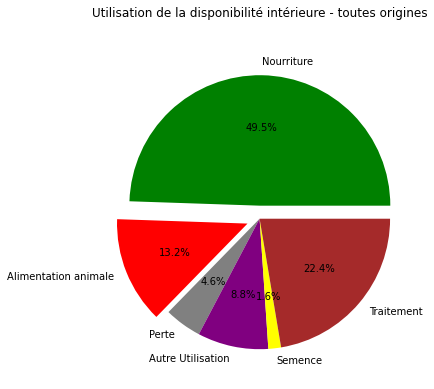

In [35]:
plt.figure(figsize = (8, 6))
x = [4876258, 1304245, 453698, 865023,154681, 2204687]
plt.pie(x, labels = ['Nourriture', 'Alimentation animale', 'Perte', 'Autre Utilisation', 'Semence', 'Traitement'],
         colors = ['green', 'red', 'grey', 'purple', 'yellow', 'brown'],
        explode = [0.1, 0.1, 0, 0, 0, 0],
        autopct = lambda x: str(round(x, 1)) + '%',)
plt.title(label = 'Utilisation de la disponibilité intérieure - toutes origines', y = 1.1)

In [36]:
Disponiblité_Intérieure_végé_appropriation = df_dispo_aliment_végé['Production'].sum() + df_dispo_aliment_végé['Importations - Quantité'].sum() - df_dispo_aliment_végé['Exportations - Quantité'].sum() + df_dispo_aliment_végé['Variation de stock'].sum()
Disponibilité_Intérieure_végé_utilisation = df_dispo_aliment_végé['Aliments pour animaux'].sum() + df_dispo_aliment_végé['Autres Utilisations'].sum() + df_dispo_aliment_végé['Nourriture'].sum() + df_dispo_aliment_végé['Pertes'].sum() + df_dispo_aliment_végé['Semences'].sum() + df_dispo_aliment_végé['Traitement'].sum()
print (Disponiblité_Intérieure_végé_appropriation)
print(Disponibilité_Intérieure_végé_utilisation)
print(df_dispo_aliment_végé['Disponibilité intérieure'].sum())

8482390.0
8490386.0
8482244.0


In [37]:
# Répartition de la disponibilité intérieure d'origine végétale
df_dispo_aliment_végé.sum()

Zone                                                             AfghanistanAfghanistanAfghanistanAfghanistanAf...
Produit                                                          Agrumes, AutresAliments pour enfantsAnanasBana...
Origine                                                          vegetalevegetalevegetalevegetalevegetalevegeta...
Aliments pour animaux                                                                                    1196619.0
Autres Utilisations                                                                                       818771.0
Disponibilité alimentaire (Kcal/personne/jour)                                                            398782.0
Disponibilité alimentaire en quantité (kg/personne/an)                                                    87710.48
Disponibilité de matière grasse en quantité (g/personne/jour)                                              8339.97
Disponibilité de protéines en quantité (g/personne/jour)                        

Text(0.5, 1.1, 'Utilisation de la disponibilité intérieure - origine végétale')

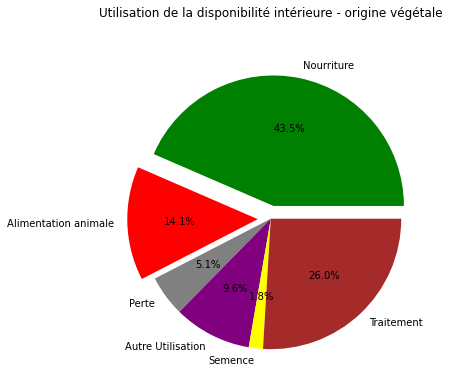

In [38]:
plt.figure(figsize = (8, 6))
x = [3692542, 1196619, 429768, 818771,149009, 2203677]
plt.pie(x, labels = ['Nourriture', 'Alimentation animale', 'Perte', 'Autre Utilisation', 'Semence', 'Traitement'],
         colors = ['green', 'red', 'grey', 'purple', 'yellow', 'brown'],
        explode = [0.1, 0.1, 0, 0, 0, 0],
        autopct = lambda x: str(round(x, 1)) + '%',)
plt.title(label = 'Utilisation de la disponibilité intérieure - origine végétale', y = 1.1)

## Q5 : Retour sur l'utilisation des céréales

In [39]:
#On regarde la liste des produits
df_disponibilité_alimentaire.Produit.unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [40]:
df_disponibilité_alimentaire_produit = df_disponibilité_alimentaire.groupby(['Produit']).sum()
df_disponibilité_alimentaire_produit

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Produit,,,,,,,,,,,,,,,
Abats Comestible,1009.0,848.0,1480.0,475.08,43.82,231.18,17587.0,4926.0,3892.0,15669.0,73.0,18591.0,0.0,0.0,26.0
"Agrumes, Autres",0.0,25.0,128.0,209.07,0.78,2.19,12176.0,830.0,1202.0,11359.0,810.0,11758.0,0.0,72.0,46.0
"Alcool, non Comestible",0.0,21769.0,0.0,0.00,0.00,0.00,21741.0,9900.0,9928.0,0.0,0.0,20763.0,0.0,0.0,950.0
Aliments pour enfants,0.0,0.0,652.0,65.14,5.06,27.16,84.0,1012.0,1100.0,761.0,1.0,0.0,0.0,0.0,8.0
Ananas,0.0,3.0,659.0,653.61,1.90,4.70,23282.0,7670.0,6324.0,20757.0,2745.0,24274.0,0.0,8.0,349.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viande de Suides,0.0,284.0,15316.0,2478.11,1369.53,686.50,112547.0,15445.0,14893.0,112100.0,275.0,113074.0,0.0,36.0,41.0
Viande de Volailles,0.0,1258.0,13029.0,3577.67,856.32,1242.95,106975.0,16692.0,15109.0,104871.0,385.0,108522.0,0.0,474.0,39.0
"Viande, Autre",57.0,15.0,1069.0,313.37,46.71,150.70,6809.0,768.0,1216.0,6823.0,13.0,6360.0,0.0,17.0,3.0


In [41]:
#On regarde la manière dont les céréales sont utilisés au niveau mondial
df_cereale = df_disponibilité_alimentaire_produit.loc[['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho']]
df_cereale.sum()

Aliments pour animaux                                             873535.00
Autres Utilisations                                               234787.00
Disponibilité alimentaire (Kcal/personne/jour)                    195121.00
Disponibilité alimentaire en quantité (kg/personne/an)             23413.58
Disponibilité de matière grasse en quantité (g/personne/jour)       1066.54
Disponibilité de protéines en quantité (g/personne/jour)            5029.91
Disponibilité intérieure                                         2406999.00
Exportations - Quantité                                           425304.00
Importations - Quantité                                           399977.00
Nourriture                                                       1029010.00
Pertes                                                            107120.00
Production                                                       2523345.00
Semences                                                           68538.00
Traitement  

In [42]:
df_cereale = df_cereale.drop(['Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure', 'Variation de stock', 'Importations - Quantité', 'Exportations - Quantité', 'Production'], axis = 1)
df_cereale

,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
Produit,,,,,,
Blé,129668.0,22424.0,457824.0,27530.0,34283.0,7877.0
"Céréales, Autres",19035.0,1388.0,5324.0,785.0,1203.0,160.0
Maïs,546116.0,189386.0,125184.0,40701.0,6837.0,47648.0
Millet,3306.0,196.0,23040.0,2276.0,682.0,403.0
Orge,92658.0,654.0,6794.0,4628.0,8804.0,26910.0
Riz (Eq Blanchi),33594.0,18464.0,377286.0,27378.0,12194.0,6740.0
Avoine,16251.0,206.0,3903.0,514.0,2485.0,36.0
Seigle,8099.0,20.0,5502.0,562.0,1262.0,1120.0
Sorgho,24808.0,2049.0,24153.0,2746.0,788.0,3695.0


Text(0.5, 1.1, 'Utilisation des céréales')

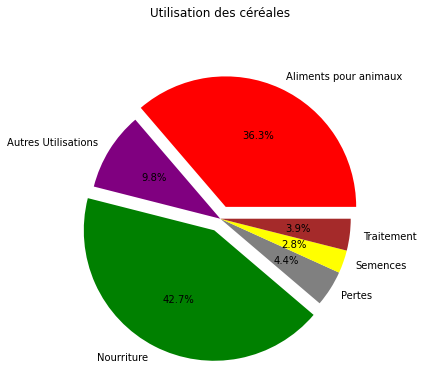

In [43]:
plt.figure(figsize = (8, 6))
x = [df_cereale['Aliments pour animaux'].sum(), df_cereale['Autres Utilisations'].sum(), df_cereale['Nourriture'].sum(), df_cereale['Pertes'].sum(), df_cereale['Semences'].sum(), df_cereale['Traitement'].sum()]
plt.pie(x, labels = df_cereale.columns,
        colors = ['red', 'purple', 'green', 'grey', 'yellow', 'brown'],
        explode = [0.1, 0, 0.1, 0, 0, 0],
        autopct = lambda x: str(round(x, 1)) + '%')
plt.title(label = 'Utilisation des céréales', y = 1.1)

## Q6 : exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition.

In [44]:
#On crée le dataframe
df_thailande = df_disponibilité_alimentaire.drop(df_disponibilité_alimentaire.loc[df_disponibilité_alimentaire['Zone'] != 'Thaïlande'].index).loc[df_disponibilité_alimentaire['Produit'] == 'Manioc']
df_thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


Text(0.5, 1.1, 'Zoom sur le Manioc en Thaïlande')

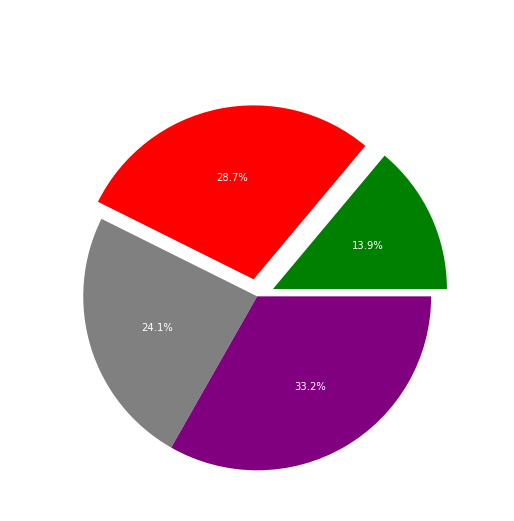

In [53]:
plt.figure(figsize = (8, 8))
x = [871, 1800, 1511, 2081]
plt.pie(x, labels = ['Nourriture', 'Alimentation animale', 'Perte', 'Autre Utilisation'],
        colors = ['green', 'red', 'grey', 'purple'],
        explode = [0.1, 0.1, 0, 0],
        autopct = lambda x: str(round(x, 1)) + '%',
        textprops = {'color' : 'white'} )
plt.title(label = 'Zoom sur le Manioc en Thaïlande', y = 1.1, fontdict = {'fontsize': 30, 'color': 'white'})

In [54]:
# Destination de la production de manioc en Thaïlande
tx_export = df_thailande['Exportations - Quantité'].loc[df_thailande['Produit'] == 'Manioc']/df_thailande['Production'].loc[df_thailande['Produit'] == 'Manioc']*100
round(tx_export, 2)

13809    83.41
dtype: float64

In [55]:
#On regarde la sous-nutrition en Thaïlande
sn_thaïlande = df_pop_sn['sous_nutrition'].loc[df_pop_sn['Zone'] == 'Thaïlande'].sum()/df_pop_sn['population'].loc[df_pop_sn['Zone'] == 'Thaïlande'].sum()*100
print (round(sn_thaïlande, 2), '% de la population thaïlandaise souffre de la sous-nutrition')

8.96 % de la population thaïlandaise souffre de la sous-nutrition


## Q7 : Bénéficiaires de l'aide alimentaire

In [56]:
# On crée le dataframe sur l'aide alimentaire
df_aide_alimentaire = pd.read_csv('/home/paul/Bureau/OPENCLASSROOM/PROJET/4/aide_alimentaire.csv')
df_aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [57]:
df_aide_alimentaire.rename(columns = {'Valeur' : 'aide_alimentaire_tonne'}, inplace = True)

In [58]:
df_aide_alimentaire.dtypes

Pays bénéficiaire         object
Année                      int64
Produit                   object
aide_alimentaire_tonne     int64
dtype: object

In [59]:
# On regarde les dix pays ayant le plus bénéficié de l'aide alimentaire entre 2013 et 2016
df_aide_alimentaire_group = df_aide_alimentaire.groupby(['Pays bénéficiaire']).sum()
df_aide_alimentaire_group.sort_values(by = 'aide_alimentaire_tonne', ascending = False).head(10)

,Année,aide_alimentaire_tonne
Pays bénéficiaire,,
République arabe syrienne,76543,1858943
Éthiopie,66460,1381294
Yémen,76553,1206484
Soudan du Sud,44309,695248
Soudan,48335,669784
Kenya,54376,552836
Bangladesh,50347,348188
Somalie,54377,292678
République démocratique du Congo,50350,288502


In [60]:
# On supprime la colonne 'Annéee' qui n'a plus de sens
df_aide_alimentaire_group.drop(columns = ['Année'], inplace = True)
df_aide_alimentaire_group

,aide_alimentaire_tonne
Pays bénéficiaire,
Afghanistan,185452
Algérie,81114
Angola,5014
Bangladesh,348188
Bhoutan,2666
...,...
Zambie,3026
Zimbabwe,62570
Égypte,1122


In [61]:
#On reindexe df_aide_alimentaire_group...
df_aide_alimentaire_group.reset_index(inplace = True)
df_aide_alimentaire_group.head(10)

,Pays bénéficiaire,aide_alimentaire_tonne
0,Afghanistan,185452
1,Algérie,81114
2,Angola,5014
3,Bangladesh,348188
4,Bhoutan,2666
5,Bolivie (État plurinational de),6
6,Burkina Faso,64812
7,Burundi,77318
8,Bénin,22224
9,Cambodge,25780


No handles with labels found to put in legend.


Text(0.5, 1.1, "Les 10 pays où l'aide alimentaire a été la plus importante entre 2013 et 2016")

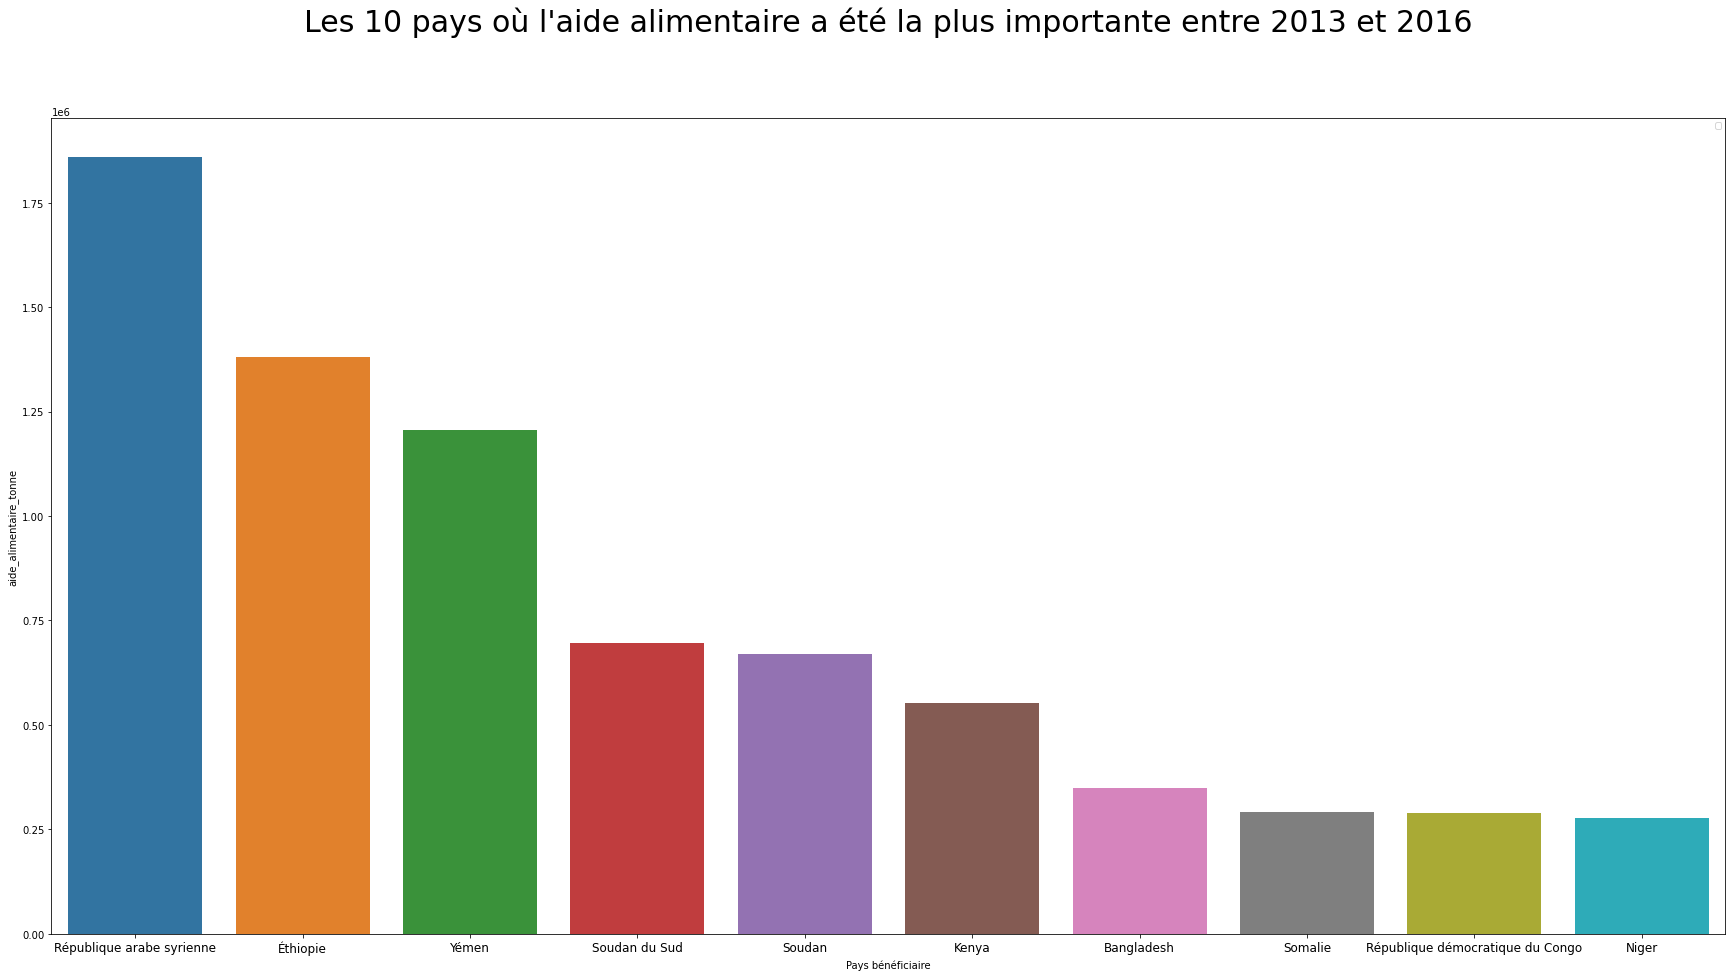

In [62]:
## ... afin de créer un graphique en barre...
plt.figure(figsize = (30, 15))
sns.barplot(x = 'Pays bénéficiaire', y = 'aide_alimentaire_tonne', data = df_aide_alimentaire_group.sort_values(by = 'aide_alimentaire_tonne', ascending = False).head(10))
plt.xticks(fontsize = 12)
plt.legend(prop = {'size' : 8})
plt.title(label = 'Les 10 pays où l\'aide alimentaire a été la plus importante entre 2013 et 2016', y = 1.1, fontdict = {'fontsize': 30})

## Q8 : les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [63]:
# On calcul le taux de sous_nutrition pour chaque pays
df_tx_sous_nutrition = df_pop_sn.assign(tx_sous_nutrition = df_pop_sn['sous_nutrition']/df_pop_sn['population']*100)
df_tx_sous_nutrition.sort_values(by = 'tx_sous_nutrition', ascending = False)

,Zone,Année,sous_nutrition,population,tx_sous_nutrition
78,Haïti,2017,5300000.0,10982366.0,48.259182
157,République populaire démocratique de Corée,2017,12000000.0,25429825.0,47.188685
108,Madagascar,2017,10500000.0,25570512.0,41.062924
103,Libéria,2017,1800000.0,4702226.0,38.279742
100,Lesotho,2017,800000.0,2091534.0,38.249438
...,...,...,...,...,...
113,Malte,2017,0.0,437933.0,0.000000
111,Maldives,2017,0.0,496402.0,0.000000
47,Croatie,2017,0.0,4182857.0,0.000000
106,Luxembourg,2017,0.0,591910.0,0.000000


In [64]:
#On crée un DF des pays où le taux de sous-nutrition est supérieure à la moyenne mondiale
df_paysSousNourris = pd.merge(df_tx_sous_nutrition[df_tx_sous_nutrition['tx_sous_nutrition'] > tx_sn_mondial_2017], df_disponibilité_alimentaire_group, on = 'Zone')
df_paysSousNourris

,Zone,Année,sous_nutrition,population,tx_sous_nutrition,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,10500000.0,3.629611e+07,28.928718,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
1,Angola,2017,5800000.0,2.981677e+07,19.452143,9259.0,451.0,2474.0,701.46,53.54,57.27,32029.0,23.0,4416.0,15059.0,4799.0,28857.0,337.0,2121.0,-1228.0
2,Bangladesh,2017,21500000.0,1.596854e+08,13.463972,3335.0,2015.0,2453.0,364.54,29.92,55.86,72757.0,328.0,10013.0,57092.0,4080.0,68294.0,1332.0,4907.0,-5219.0
3,Bénin,2017,800000.0,1.117520e+07,7.158710,2004.0,1433.0,2619.0,604.16,49.70,64.38,11966.0,299.0,1776.0,6236.0,1357.0,10866.0,691.0,247.0,-375.0
4,Bolivie (État plurinational de),2017,1700000.0,1.119286e+07,15.188261,1244.0,277.0,2250.0,516.79,53.07,65.96,18728.0,1790.0,657.0,5513.0,450.0,19688.0,479.0,10777.0,173.0
5,Botswana,2017,500000.0,2.205080e+06,22.674914,24.0,34.0,2325.0,549.63,66.02,64.85,1253.0,68.0,958.0,1113.0,51.0,502.0,3.0,23.0,-143.0
6,Burkina Faso,2017,3600000.0,1.919323e+07,18.756610,45.0,451.0,2717.0,557.69,61.54,79.37,12040.0,377.0,1292.0,9445.0,643.0,11864.0,152.0,1367.0,-737.0
7,Cambodge,2017,2400000.0,1.600941e+07,14.991184,607.0,9428.0,2473.0,410.36,35.93,65.66,18839.0,793.0,477.0,6210.0,1984.0,18785.0,272.0,345.0,362.0
8,Congo,2017,1400000.0,5.110695e+06,27.393535,16.0,43.0,2206.0,580.47,46.62,51.41,3542.0,6.0,604.0,2583.0,342.0,2968.0,3.0,554.0,-22.0
9,Côte d'Ivoire,2017,4900000.0,2.443747e+07,20.051176,553.0,190.0,2797.0,665.83,59.24,58.45,19616.0,2612.0,2408.0,13528.0,1669.0,20420.0,1245.0,2429.0,-604.0


In [65]:
tx_population_paysSn = df_paysSousNourris['population'].sum()/df_tx_sous_nutrition['population'].sum()*100
print('En 2017, 54 pays, représentant', round(tx_population_paysSn, 2), '% de la population mondial', 'souffraient d\'un taux de sous_nutrition supérieure au taux mondiale' )

En 2017, 54 pays, représentant 42.01 % de la population mondial souffraient d'un taux de sous_nutrition supérieure au taux mondiale


In [66]:
#On crée un DF des 10 pays où le taux de sous-nutrition est le plus élévé
df_paysSousNourris_top10 = pd.merge(df_tx_sous_nutrition.sort_values(by = 'tx_sous_nutrition', ascending = False).head(10), df_disponibilité_alimentaire_group, on = 'Zone')
df_paysSousNourris_top10

,Zone,Année,sous_nutrition,population,tx_sous_nutrition,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Haïti,2017,5300000.0,10982366.0,48.259182,481.0,115.0,2089.0,397.78,48.92,47.70,6175.0,15.0,1204.0,4101.0,679.0,5072.0,36.0,762.0,-77.0
1,République populaire démocratique de Corée,2017,12000000.0,25429825.0,47.188685,816.0,695.0,2093.0,458.93,36.41,54.99,14876.0,83.0,993.0,11425.0,1066.0,13883.0,194.0,678.0,84.0
2,Madagascar,2017,10500000.0,25570512.0,41.062924,842.0,2522.0,2056.0,425.07,24.49,46.69,15216.0,236.0,924.0,9741.0,966.0,14160.0,375.0,844.0,375.0
3,Libéria,2017,1800000.0,4702226.0,38.279742,35.0,7.0,2206.0,385.48,59.85,37.66,2002.0,34.0,470.0,1653.0,111.0,1533.0,16.0,179.0,35.0
4,Lesotho,2017,800000.0,2091534.0,38.249438,1.0,0.0,2528.0,434.51,32.26,73.48,966.0,32.0,467.0,899.0,51.0,418.0,5.0,10.0,114.0
5,Tchad,2017,5700000.0,15016753.0,37.957606,104.0,2.0,2109.0,319.45,47.10,62.75,5304.0,0.0,290.0,4097.0,459.0,5153.0,101.0,542.0,-141.0
6,Rwanda,2017,4200000.0,11980961.0,35.055619,0.0,19.0,2224.0,787.35,23.77,56.79,10054.0,331.0,558.0,9273.0,435.0,12952.0,165.0,167.0,-3128.0
7,Mozambique,2017,9400000.0,28649018.0,32.810898,1720.0,2204.0,2282.0,485.40,41.90,45.68,22023.0,419.0,1568.0,12538.0,1163.0,20742.0,167.0,4241.0,133.0
8,Timor-Leste,2017,400000.0,1243258.0,32.173531,9.0,2.0,2129.0,369.10,51.08,57.51,447.0,23.0,100.0,419.0,14.0,371.0,2.0,3.0,2.0
9,Afghanistan,2017,10500000.0,36296113.0,28.928718,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0


No handles with labels found to put in legend.


Text(0.5, 1.1, 'Les 10 pays où le taux de sous-nutrition est le plus élévé')

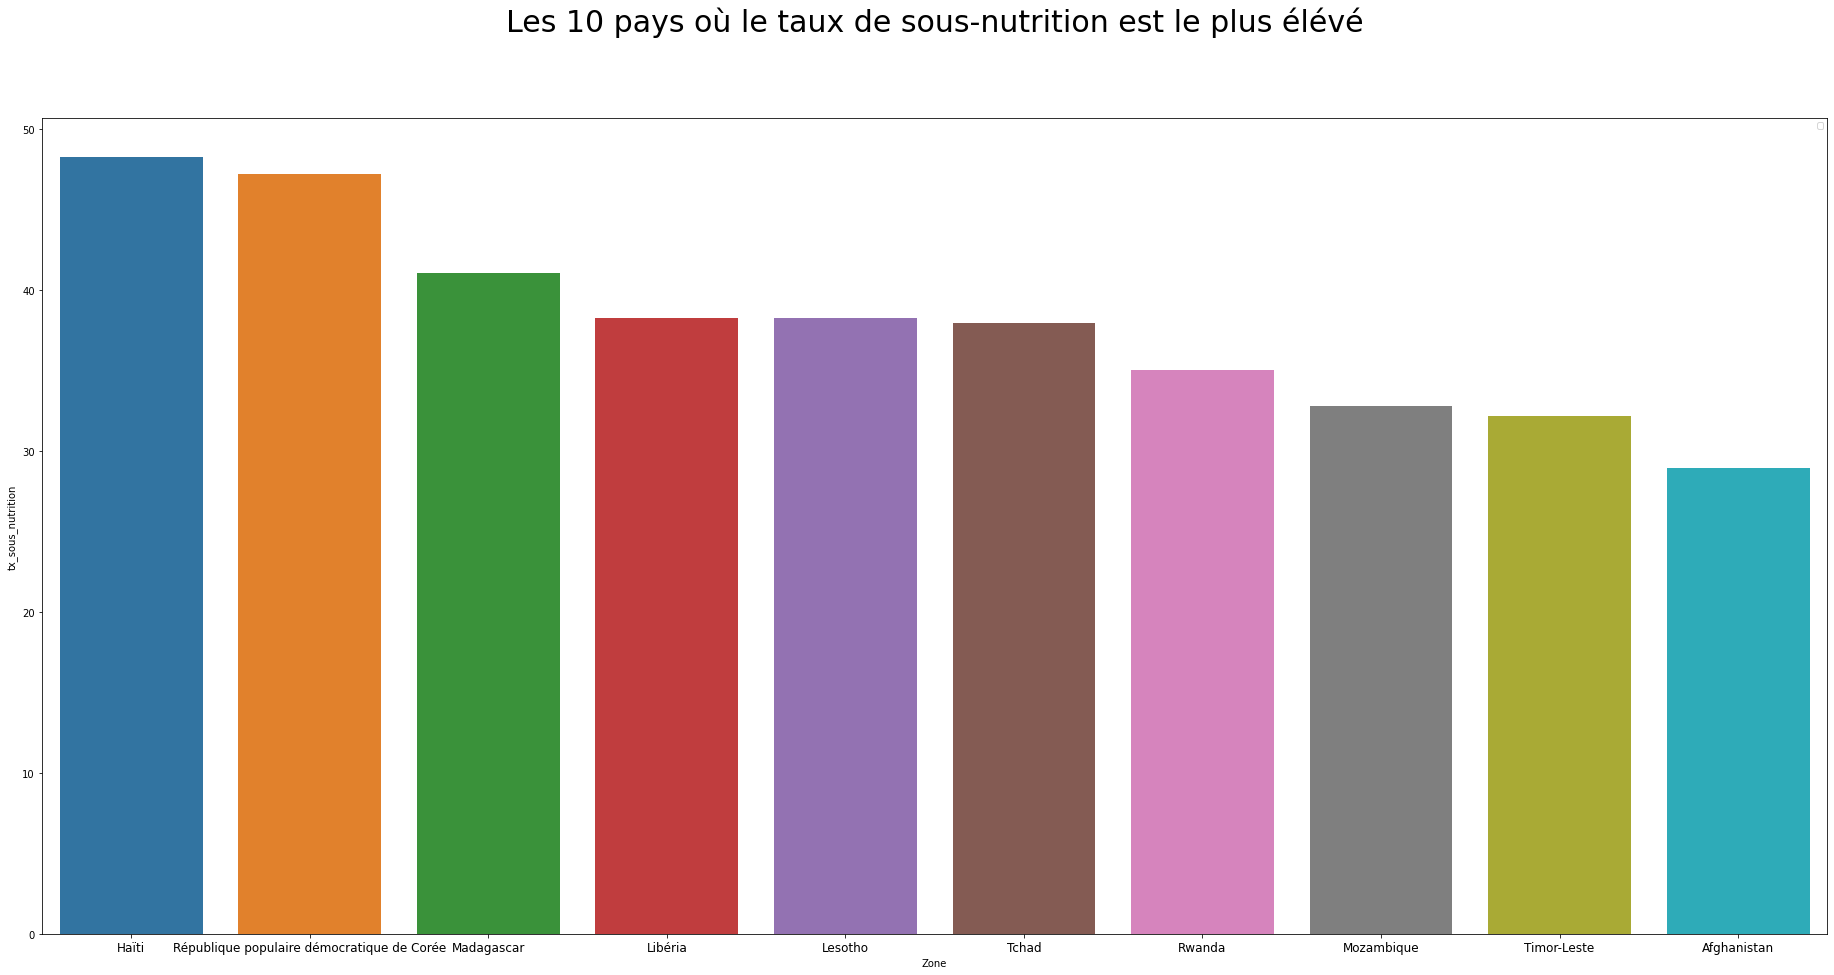

In [67]:
plt.figure(figsize = (32, 15))
sns.barplot(x = 'Zone', y = 'tx_sous_nutrition', data = df_paysSousNourris_top10)
plt.xticks(fontsize = 12)
plt.legend(prop = {'size' : 8})
plt.title(label = 'Les 10 pays où le taux de sous-nutrition est le plus élévé', y = 1.1, fontdict = {'fontsize': 30})

## Q9 : Pays ayant le plus/le moins de disponibilité/habitant

In [68]:
#Pays les moins bien lotis
df_disponibilité_alimentaire_group = df_disponibilité_alimentaire.groupby('Zone').sum()
df_disponibilité_alimentaire_group = df_disponibilité_alimentaire_group.reset_index()
df_disponibilité_alimentaire_group.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)').head(10)

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
128,République centrafricaine,1.0,27.0,1879.0,453.73,59.41,46.04,2582.0,0.0,76.0,2092.0,122.0,2503.0,63.0,278.0,3.0
166,Zambie,408.0,69.0,1924.0,350.12,42.05,55.22,10041.0,675.0,380.0,5088.0,242.0,10526.0,76.0,4178.0,-182.0
91,Madagascar,842.0,2522.0,2056.0,425.07,24.49,46.69,15216.0,236.0,924.0,9741.0,966.0,14160.0,375.0,844.0,375.0
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
65,Haïti,481.0,115.0,2089.0,397.78,48.92,47.70,6175.0,15.0,1204.0,4101.0,679.0,5072.0,36.0,762.0,-77.0
133,République populaire démocratique de Corée,816.0,695.0,2093.0,458.93,36.41,54.99,14876.0,83.0,993.0,11425.0,1066.0,13883.0,194.0,678.0,84.0
151,Tchad,104.0,2.0,2109.0,319.45,47.10,62.75,5304.0,0.0,290.0,4097.0,459.0,5153.0,101.0,542.0,-141.0
167,Zimbabwe,131.0,23.0,2113.0,336.59,57.18,48.32,9507.0,278.0,1342.0,4762.0,188.0,7914.0,76.0,4330.0,531.0
114,Ouganda,348.0,68.0,2126.0,535.58,46.57,52.64,26624.0,1218.0,1257.0,20121.0,991.0,26321.0,154.0,4982.0,269.0
154,Timor-Leste,9.0,2.0,2129.0,369.10,51.08,57.51,447.0,23.0,100.0,419.0,14.0,371.0,2.0,3.0,2.0


In [69]:
#On calcule la population de ces pays
df_pop_dispofaible = df_pop_sn_dispaliment.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)').head(10)
pop_dispofaible = df_pop_dispofaible['population'].sum() / df_pop_sn_dispaliment['population'].sum() * 100
print(round(pop_dispofaible, 1), '%')

2.6 %


No handles with labels found to put in legend.


Text(0.5, 1, 'Les 10 pays où la disponibilité alimentaire (Kcal/personne/jour) est la plus faible (2,6 % de la pop. mondiale)')

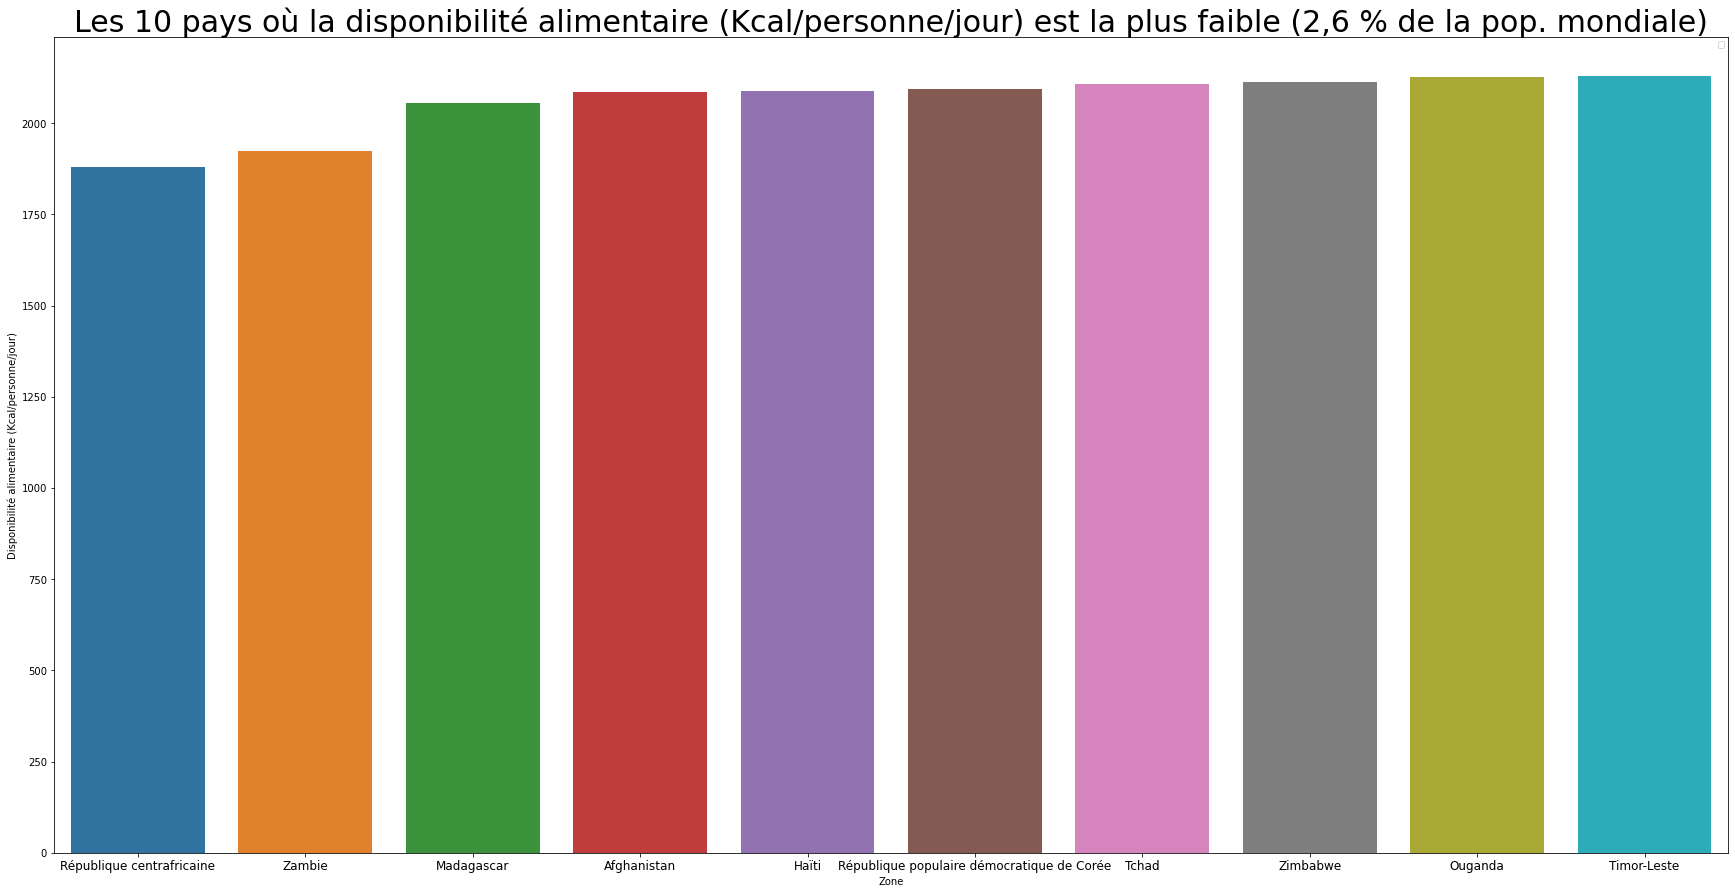

In [70]:
plt.figure(figsize = (30, 15))
sns.barplot(x = 'Zone', y = 'Disponibilité alimentaire (Kcal/personne/jour)', data = df_disponibilité_alimentaire_group.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)').head(10))
plt.xticks(fontsize = 12)
plt.legend(prop = {'size' : 8})
plt.title(label = 'Les 10 pays où la disponibilité alimentaire (Kcal/personne/jour) est la plus faible (2,6 % de la pop. mondiale)', y = 1, fontdict = {'fontsize': 30})

In [71]:
#Pays les mieux lotis
df_disponibilité_alimentaire_group.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = False).head(10)

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
11,Autriche,3412.0,1001.0,3770.0,1069.20,170.44,106.20,19308.0,6733.0,8463.0,9085.0,459.0,18129.0,173.0,5178.0,-556.0
16,Belgique,5533.0,3226.0,3737.0,1002.09,161.95,99.37,29358.0,30345.0,35276.0,11134.0,564.0,24496.0,153.0,8960.0,-64.0
159,Turquie,17750.0,3006.0,3708.0,968.15,119.64,108.12,131377.0,14593.0,12136.0,72551.0,12036.0,137432.0,2553.0,23560.0,-3599.0
171,États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0
74,Israël,2525.0,801.0,3610.0,922.14,151.39,128.00,11267.0,1648.0,5883.0,7132.0,220.0,6906.0,71.0,564.0,128.0
72,Irlande,3758.0,1120.0,3602.0,1150.15,125.69,109.91,10738.0,6828.0,6254.0,5320.0,236.0,11501.0,89.0,399.0,-192.0
75,Italie,16144.0,3228.0,3578.0,993.20,154.69,108.49,97405.0,23643.0,38692.0,60584.0,1861.0,80855.0,736.0,14870.0,1496.0
89,Luxembourg,147.0,11.0,3540.0,1150.66,141.49,113.64,802.0,821.0,1076.0,607.0,11.0,593.0,9.0,24.0,-41.0
168,Égypte,15084.0,2262.0,3518.0,803.79,63.09,103.22,115133.0,5014.0,24100.0,65957.0,7608.0,95848.0,1365.0,22924.0,199.0
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0


In [72]:
#On calcule la population de ces pays
df_pop_dispoforte = df_pop_sn_dispaliment.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)
pop_dispoforte = df_pop_dispoforte['population'].sum() / df_pop_sn_dispaliment['population'].sum() * 100
print(round(pop_dispoforte, 1), '%')

9.3 %


No handles with labels found to put in legend.


Text(0.5, 1, 'Les 10 pays où la disponibilité alimentaire (Kcal/personne/jour) est la plus élevé (9,3 % de la pop. mondiale)')

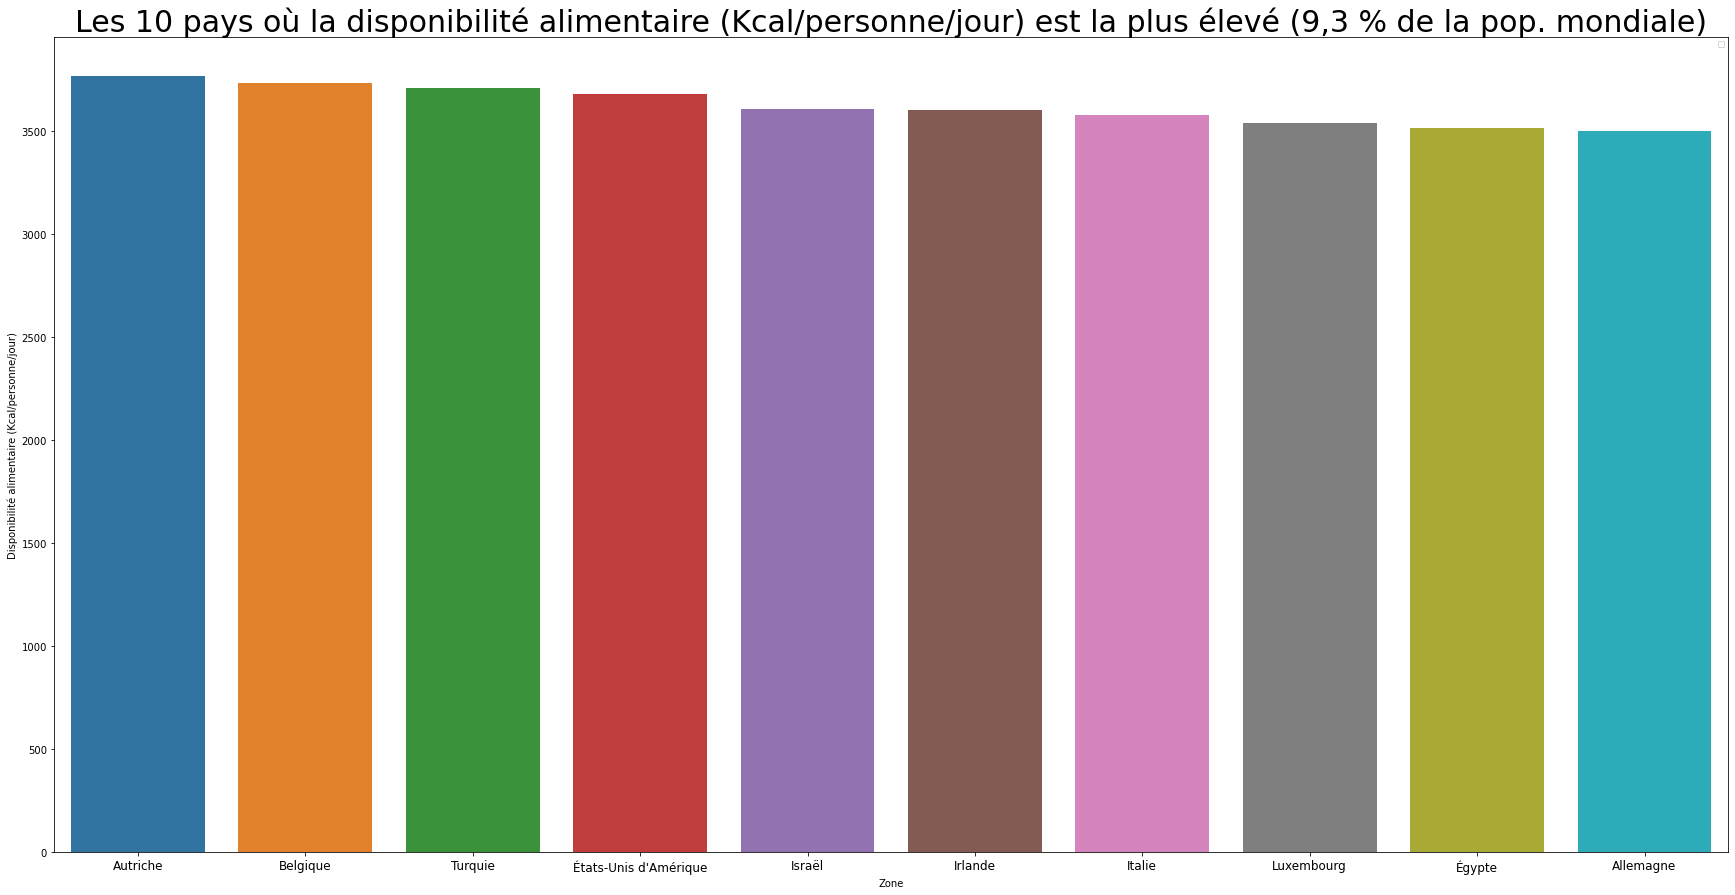

In [73]:
plt.figure(figsize = (30, 15))
sns.barplot(x = 'Zone', y = 'Disponibilité alimentaire (Kcal/personne/jour)', data = df_disponibilité_alimentaire_group.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = False).head(10))
plt.xticks(fontsize = 12)
plt.legend(prop = {'size' : 8})
plt.title(label = 'Les 10 pays où la disponibilité alimentaire (Kcal/personne/jour) est la plus élevé (9,3 % de la pop. mondiale)', y = 1, fontdict = {'fontsize': 30})

In [74]:
df_dispo_superieure = df_pop_sn_dispaliment.loc[df_pop_sn_dispaliment['Disponibilité alimentaire (Kcal/personne/jour)'] > 3000]
pop_dispo_superieure = df_dispo_superieure['population'].sum() / df_pop_sn_dispaliment['population'].sum()*100
print(round(pop_dispo_superieure, 1), '%')

47.3 %


In [75]:
df_dispo_superieure.value_counts(subset='Zone').sum()

61

In [76]:
pop_dispo_inférieure = df_pop_sn_dispaliment['population'].loc[df_pop_sn_dispaliment['Disponibilité alimentaire (Kcal/personne/jour)'] < 2500].sum() / df_pop_sn_dispaliment['population'].sum()*100
print(round(pop_dispo_inférieure, 1), '%')

32.9 %


In [77]:
df_pop_sn_dispaliment['population'].loc[df_pop_sn_dispaliment['Disponibilité alimentaire (Kcal/personne/jour)'] < 2500].count()

40

In [78]:
#Pays ne déclarant pas de sous-alimentation
df_pop_sn[df_pop_sn['sous_nutrition'] != 0].count()

Zone              84
Année             84
sous_nutrition    84
population        84
dtype: int64

In [79]:
pop_sn = df_pop_sn['population'].loc[df_pop_sn['sous_nutrition'] != 0].sum() / df_pop_sn['population'].sum()*100
print(round(pop_sn, 1), '%')

55.4 %
